In [15]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [12]:
mnist_raw = loadmat("data\mnist-original.mat")
mnist={
    "data":mnist_raw["data"].T,
    "target":mnist_raw["label"][0]
}

x,y = mnist["data"],mnist["target"]

#shuffle data
shuffle = np.random.permutation(70000)
x,y = x[shuffle],y[shuffle]
x_train, x_test, y_train, y_test = x[:60000],x[60000:],y[:60000],y[60000:]

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


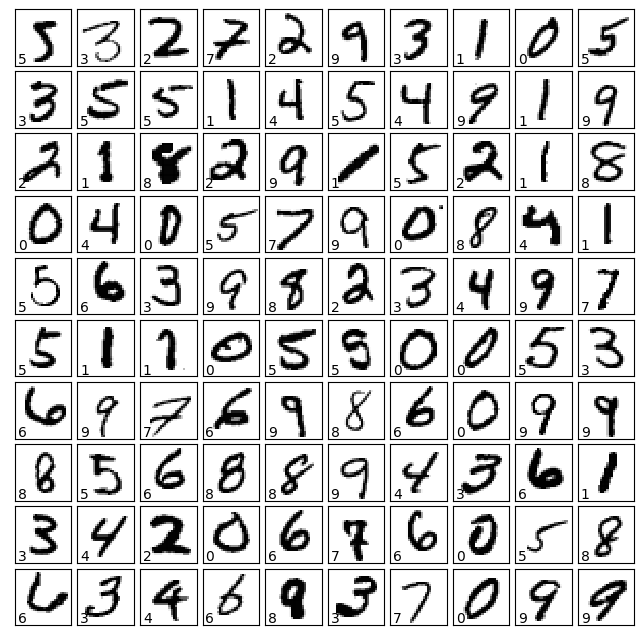

In [13]:
fig,ax = plt.subplots(10,10,
                figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]}
                ,gridspec_kw=dict(hspace=0.1,wspace=0.1))

#display image data before training
for i, axi in enumerate(ax.flat):
    axi.imshow(x_train[i].reshape(28,28),cmap='binary',interpolation='nearest')
    axi.text(0.05,0.05,str(int(y_train[i])),transform=axi.transAxes,color="black")

plt.show()

In [16]:
#create model
model = MLPClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

96.54


In [17]:
print("Accuracy : ",accuracy_score(y_test,y_pred)*100)

Accuracy :  96.54


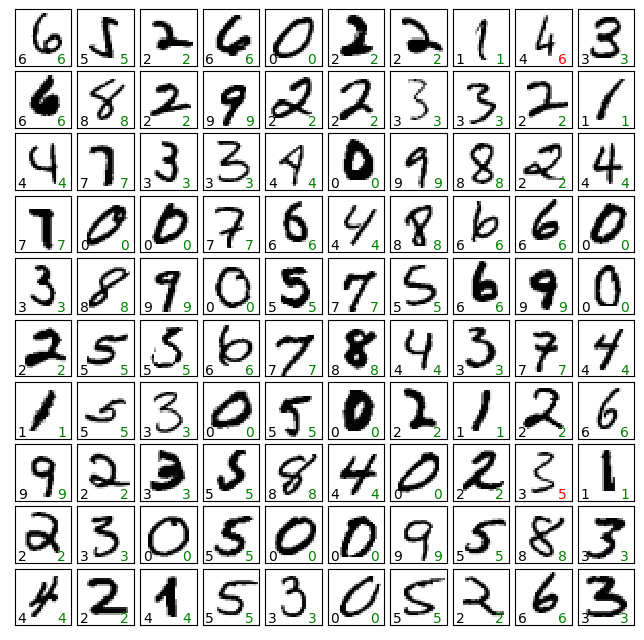

In [20]:
fig,ax = plt.subplots(10,10,
                figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]}
                ,gridspec_kw=dict(hspace=0.1,wspace=0.1))

#display image data after training & prediction
for i, axi in enumerate(ax.flat):
    #display test image data
    axi.imshow(x_test[i].reshape(28,28),cmap='binary',interpolation='nearest')
    #display text true number image data
    axi.text(0.05,0.05,str(int(y_test[i])),transform=axi.transAxes,color="black")
    #display text predict number image data
    axi.text(0.75,0.05,str(int(y_pred[i])),transform=axi.transAxes,color="green" if y_pred[i]==y_test[i] else 'red')

plt.show()